In [ ]:
!pip install cirq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.6/594.6 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 941.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.6/221.6 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7

In [ ]:
import cirq
import numpy as np
from cirq import Simulator
from cirq.contrib.svg import SVGCircuit

# Task 1

## Task 1 -1

In [ ]:
n = 5  # Number of qubits

# create a circuit with n qubits
qr = cirq.LineQubit.range(n)
circuit = cirq.Circuit()

# Appl hadamard gate on each qubit
circuit.append(cirq.H.on_each(*qr))

# Apply cnot gates on (0, 1), (1,2), (2,3), (3,4)
for i in range(4):
    circuit.append(cirq.CNOT(qr[i], qr[i+1]))

# Apply swap on (0,4)
circuit.append(cirq.SWAP(qr[0], qr[4]))

# Randomly chose a qubit for applying Rotation X gate
index = np.random.randint(n)

# Apply Rx gate on that qubit
circuit.append(cirq.rx(rads=np.pi/2).on(qr[index]))

In [ ]:
# Plotting the circuit
print(circuit) 

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────


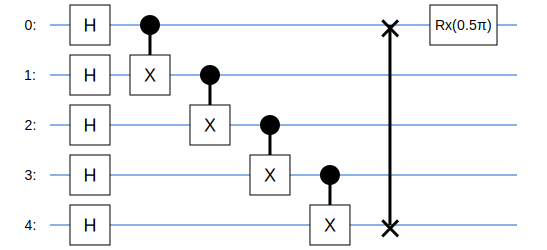

In [ ]:
SVGCircuit(circuit)

## Task 1-2

In [ ]:
n2 = 4  


# create a circuit with n qubits
qr2 = cirq.LineQubit.range(n)
circuit2 = cirq.Circuit()

# Apply a Hadmard gate to the first qubit
circuit2.append(cirq.H(qr[0]))

# Rotate the second qubit by pi/3 around X
circuit2.append(cirq.rx(rads=np.pi/3).on(qr[1]))

# Apply Hadamard gate to the third and fourth qubit
circuit2.append(cirq.H(qr[2]))
circuit2.append(cirq.H(qr[3]))

# Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>

#Defining ancilla qubit
ancilla = cirq.LineQubit(4)

circuit2.append(cirq.H(ancilla))

# Apply controlled-SWAP gates between the ancilla qubit and the two pairs of qubits
circuit2.append(cirq.CSWAP(ancilla, qr2[0], qr2[2]))
circuit2.append(cirq.CSWAP(ancilla, qr2[1], qr2[3]))

# Apply Hadamard gate to the ancilla qubit
circuit2.append(cirq.H(ancilla))

# Measure the ancilla qubit
circuit2.append(cirq.measure(ancilla, key='result'))

print(circuit2)


0: ───H────────────×─────────────────────────
                   │
1: ───Rx(0.333π)───┼───×─────────────────────
                   │   │
2: ───H────────────×───┼─────────────────────
                   │   │
3: ───H────────────┼───×─────────────────────
                   │   │
4: ───H────────────@───@───H───M('result')───


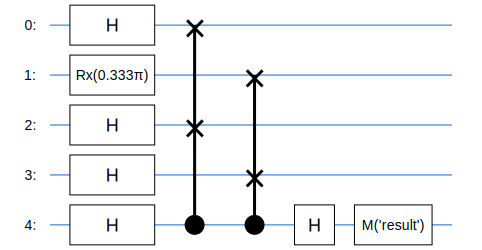

In [ ]:
SVGCircuit(circuit2)

In [ ]:
# Run the circuit
simulator = cirq.Simulator()

result = simulator.run(circuit2,repetitions=10)


# Print the measurement result
print('Measurement result:', result.measurements['result'])


Measurement result: [[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]


Text(0, 0.5, 'Probabilities')

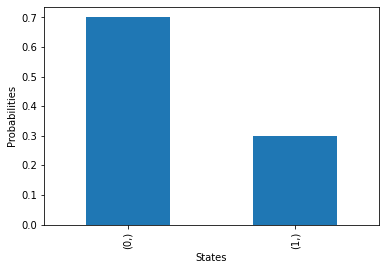

In [ ]:
ax = (result.data.value_counts()/10).plot(kind='bar')
ax.set_xlabel("States")
ax.set_ylabel("Probabilities")